## Importing Libraries

In [33]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import mysql.connector

## Connect and Read Data from My SQL Server

In [2]:
mydb = mysql.connector.connect(host = "localhost", user = "root", password = "", database = "climate predictive analysis") or die ("could not connect to database")

mycursor = mydb.cursor()

In [132]:
dataframe1 = pd.read_sql("SELECT * FROM sensors_data", con = mydb)
dataframe1.head()

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,Rain,Temperature,Humidity,Pressure,Date Time
0,227,0,28,81,491.0,2022-05-27 04:35:43
1,228,0,28,81,491.0,2022-05-27 04:36:43
2,229,0,28,82,491.0,2022-05-27 04:37:43
3,230,0,28,82,491.0,2022-05-27 04:38:43
4,231,0,28,82,491.0,2022-05-27 04:39:44


## Handeling Datetime Column

In [ ]:
dataframe1["Year"] = dataframe1["Date Time"].dt.strftime("%Y")
dataframe1["Month"] = dataframe1["Date Time"].dt.strftime("%m")
dataframe1["Day"] = dataframe1["Date Time"].dt.strftime("%d")
dataframe1["Hour"] = dataframe1["Date Time"].dt.strftime("%H")
dataframe1["Minute"] = dataframe1["Date Time"].dt.strftime("%M")
dataframe1["Second"] = dataframe1["Date Time"].dt.strftime("%S")

In [23]:
dataframe1.tail()

,ID,Rain,Temperature,Humidity,Pressure,Date Time,Year,Month,Day,Hour,Minute,Second
1148,1375,1,29,60,502.0,2022-06-07 15:58:09,2022,06,07,15,58,09
1149,1376,1,29,60,502.0,2022-06-07 15:58:10,2022,06,07,15,58,10
1150,1377,1,29,60,502.0,2022-06-07 15:58:11,2022,06,07,15,58,11
1151,1378,1,29,60,502.0,2022-06-07 15:58:12,2022,06,07,15,58,12
1152,1379,1,29,60,502.0,2022-06-07 15:58:13,2022,06,07,15,58,13


## Visulalizing Orignal Data

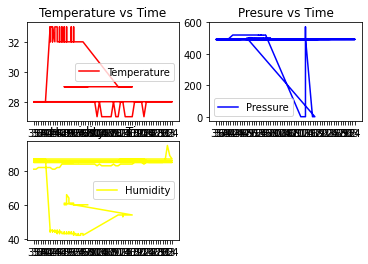

In [7]:

plt.subplot(2, 2, 1)
plt.plot(dataframe1["Minute"], dataframe1["Temperature"], label = "Temperature", color = "red")
plt.title('Temperature vs Time')
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(dataframe1["Minute"], dataframe1["Pressure"], label = "Pressure", color = "blue")
plt.title('Presure vs Time')
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(dataframe1["Minute"], dataframe1["Humidity"], label = "Humidity", color = "yellow")
plt.title('Humidity vs Time')
plt.legend()
plt.show()

## Splitting features from targets

In [8]:
Y = np.array(dataframe1["Temperature"])
X = np.array(dataframe1.iloc[:, 6:11])
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (1153, 5)
Y shape:  (1153,)


## Splitting Data to Train and Test set

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=100)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shape: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (922, 5)
X_test shape:  (231, 5)
Y_train shape:  (922,)
Y_test shape:  (231,)


## Trainig Random Forest Regressor

In [10]:
regressor = RandomForestRegressor(n_estimators=300, max_depth = 70, random_state=100)
regressor.fit(X_train, Y_train)

RandomForestRegressor(max_depth=70, n_estimators=300, random_state=100)

## Making Predictions

In [11]:
predictData = regressor.predict(X_test)
print(predictData)

[29.         32.12041211 32.         32.23866139 32.23866139 29.
 32.74402212 32.         28.         29.         29.         32.
 29.         29.         32.07875895 29.         29.         29.
 29.         29.         32.         29.         32.         29.
 28.         32.23866139 28.         32.         28.         32.07875895
 28.         29.         32.12041211 32.         29.         29.
 29.         29.         32.07875895 32.03783607 32.23866139 29.
 28.         27.00666667 32.0445309  29.         28.         27.89666667
 29.         28.         32.0445309  32.12041211 32.         29.
 28.         29.         32.         32.         32.12041211 32.76302311
 32.         32.         29.         29.         29.         32.74402212
 29.         29.         29.         32.74402212 32.0339629  32.
 32.03820145 32.         29.         29.         32.94139377 27.62666667
 27.99666667 27.56666667 32.0339629  29.         29.         28.
 29.         29.         29.         28.         3

## Testing Our Model

In [12]:
print(predictData.astype(int))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictData))
#Mean Absolute Error calculates the average difference between the calculated values and actual values
#It is used to predict the accuracy of the machine learning model.

print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictData))
# the average squared difference between the estimated values and true value. 

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictData)))

[29 32 32 32 32 29 32 32 28 29 29 32 29 29 32 29 29 29 29 29 32 29 32 29
 28 32 28 32 28 32 28 29 32 32 29 29 29 29 32 32 32 29 28 27 32 29 28 27
 29 28 32 32 32 29 28 29 32 32 32 32 32 32 29 29 29 32 29 29 29 32 32 32
 32 32 29 29 32 27 27 27 32 29 29 28 29 29 29 28 32 29 32 29 29 28 28 29
 28 32 32 29 29 32 32 28 29 29 29 29 32 28 29 29 32 29 28 28 32 29 32 28
 32 29 32 29 29 32 29 32 32 29 32 32 29 29 29 27 32 29 29 32 32 29 29 32
 29 29 29 27 28 29 32 29 29 29 32 32 32 32 27 28 29 29 32 29 32 29 32 29
 29 28 32 28 29 32 32 29 29 28 29 32 29 32 27 32 27 29 29 32 29 32 32 29
 29 32 29 28 29 32 29 29 29 28 28 29 27 29 32 28 32 29 29 28 29 32 29 27
 29 32 29 28 32 32 29 29 29 32 29 29 29 29 32]
Mean Absolute Error: 0.055927806823122476
Mean Squared Error: 0.031292316138297284
Root Mean Squared Error: 0.17689634291951115


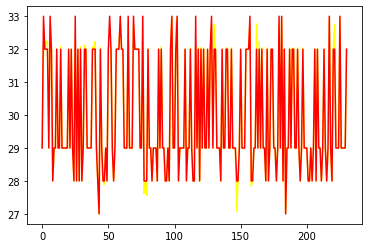

In [13]:
## Visualize Predicted output vs Actual output
import matplotlib.pyplot as plt
plt.plot(predictData, color = "yellow")
plt.plot(Y_test, color = "red")

plt.show()

## Loading Model And Making Predictions

In [182]:
import joblib
temp_model = joblib.load("RandomForestRegressorTemperature.joblib")

In [183]:
day1 = 2022, 6, 17, 11, 00
day2 = 2022, 6, 18, 11, 00
day3 = 2022, 6, 19, 11, 00
day4 = 2022, 6, 20, 11, 00
print(day1)

(2022, 6, 17, 11, 0)


In [184]:
temp_model.predict([list(day1)])

array([29.])

# Rain Prediction Model

In [133]:
dataset = pd.read_sql("SELECT * FROM sensors_data", con = mydb)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [134]:
dataset.tail()

,ID,Rain,Temperature,Humidity,Pressure,Date Time
1148,1375,1,29,60,502.0,2022-06-07 15:58:09
1149,1376,1,29,60,502.0,2022-06-07 15:58:10
1150,1377,1,29,60,502.0,2022-06-07 15:58:11
1151,1378,1,29,60,502.0,2022-06-07 15:58:12
1152,1379,1,29,60,502.0,2022-06-07 15:58:13


In [135]:
dataset1 = dataset.copy()

In [136]:
dataset1 = dataset1.drop(["ID", "Date Time"], axis = 1)

In [137]:
dataset1.head()

,Rain,Temperature,Humidity,Pressure
0,0,28,81,491.0
1,0,28,81,491.0
2,0,28,82,491.0
3,0,28,82,491.0
4,0,28,82,491.0


In [138]:
print("Rain Rows: ", (dataset1["Rain"]==1).sum())
print("Not Raining Rows: ", (dataset1["Rain"]==0).sum())

Rain Rows:  476
Not Raining Rows:  677


In [139]:
dataset1["Rain"] = dataset1["Rain"].astype("category")
dataset1["Rain"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [140]:
y = dataset1.iloc[:, 0]
x = dataset1.iloc[:, 1:]
y = np.array(y)
x = np.array(x)

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=70, shuffle = True)

In [149]:
scalar = preprocessing.MinMaxScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

In [150]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (807, 3)
y_train shape:  (807,)
x_test shape:  (346, 3)
y_test shape:  (346,)


In [101]:
import tensorflow as tf
from tensorflow import keras

In [151]:
rain_forecast_model = tf.keras.models.Sequential()

In [152]:
rain_forecast_model.add(keras.layers.Dense(units=16, input_shape = (3,), activation = "tanh"))
# rain_forecast_model.add(keras.layers.BatchNormalization())
rain_forecast_model.add(keras.layers.Dense(units=32, activation = "tanh"))
rain_forecast_model.add(keras.layers.Dense(units=64, activation = "tanh"))
rain_forecast_model.add(keras.layers.Dropout(0.5))
rain_forecast_model.add(keras.layers.Dense(units=1, activation = "sigmoid"))

In [153]:
opt = tf.keras.optimizers.RMSprop(learning_rate = 0.0001)
losss = keras.losses.BinaryCrossentropy()
rain_forecast_model.compile(loss =losss, optimizer = opt, metrics = ["accuracy"])

In [154]:
rain_forecast_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                64        
                                                                 
 dense_17 (Dense)            (None, 32)                544       
                                                                 
 dense_18 (Dense)            (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,785
Trainable params: 2,785
Non-trainable params: 0
_________________________________________________________________


In [155]:
history = rain_forecast_model.fit(x_train, y_train, validation_split=0.3, epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 15ms/step - loss: 0.7190 - accuracy: 0.4504 - val_loss: 0.7164 - val_accuracy: 0.4033
Epoch 2/200
18/18 [==============================] - 0s 6ms/step - loss: 0.7085 - accuracy: 0.5124 - val_loss: 0.7022 - val_accuracy: 0.4033
Epoch 3/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6973 - accuracy: 0.5106 - val_loss: 0.6922 - val_accuracy: 0.4033
Epoch 4/200
18/18 [==============================] - 0s 7ms/step - loss: 0.6922 - accuracy: 0.5195 - val_loss: 0.6839 - val_accuracy: 0.4321
Epoch 5/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6847 - accuracy: 0.5514 - val_loss: 0.6768 - val_accuracy: 0.4321
Epoch 6/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6767 - accuracy: 0.5904 - val_loss: 0.6699 - val_accuracy: 0.4403
Epoch 7/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6692 - accuracy: 0.5762 - val_loss: 0.6640 - val_accuracy: 0.5802
Epoch 8/200


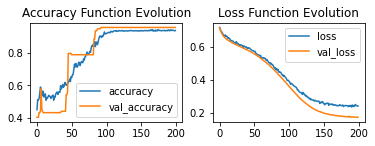

In [156]:
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Function Evolution')
plt.legend()

In [157]:
predictions = rain_forecast_model.predict(x_test)
rain_pred = []
for pred in predictions:
    if pred[0] >= 0.5:
        rain_pred.append(1)
    else:
        rain_pred.append(0)
rain_pred = np.array(rain_pred)
print(rain_pred)

[0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1
 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0
 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0
 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0
 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 0 1 1 1 1]


In [158]:
# print(predictions.astype(int))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rain_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rain_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rain_pred)))

Mean Absolute Error: 0.06936416184971098
Mean Squared Error: 0.06936416184971098
Root Mean Squared Error: 0.26337076878368826


## Accuracy

In [159]:
model_accuracy = accuracy_score(y_test, rain_pred)
print(model_accuracy)

0.930635838150289


## Saving Model

In [176]:
rain_forecast_model.save("rain_forcast_ANN_model.h5")

## Loading Rain Model and Making Predictions

In [179]:
from tensorflow.keras import models
rain_model = models.load_model("rain_forcast_ANN_model.h5")

In [180]:
example = [[0.33333333, 0.35849057, 0.96346154],
[0.16666667, 0.8490566 , 0.94807692],
[0.15333333, 0.50000, 0.90538462]]
rain_model.predict(example)

array([[0.9671391],
       [0.2766055],
       [0.9827765]], dtype=float32)

#### Temperature Model Predictions

In [186]:
import joblib
temp_model = joblib.load("RandomForestRegressorTemperature.joblib")
day1 = 2022, 6, 17, 11, 00
day2 = 2022, 6, 18, 11, 00
day3 = 2022, 6, 19, 11, 00
day4 = 2022, 6, 20, 11, 00
temp_model.predict([list(day1)])

array([29.])